- First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

## Train a machine learning model
- When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

## Evaluate model and present findings
- After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

In [67]:
import pandas as pd #libary for data manupulation
import numpy as np  #libary for calulation
import seaborn as sns # library for vizualization
import matplotlib.pyplot as plt# library for vizualization
plt.rcParams.update({'font.size': 14})

import warnings #library for ignoring warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv(r'Customer behaviour.csv',encoding='latin-1') #Latin-1 is a character encoding that can represent all 256 characters in the ASCII and ISO-8859-1 character sets. This encoding is commonly used for text files that are written in Western European languages.
df.head() #Displaying top rows

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [69]:
df.describe() #staststical display of rows

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [70]:

df.info() #checking datatypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [71]:
df.tail() #displaying bottom rows

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


<AxesSubplot:title={'center':'Top 20 countries by Booking Origin'}, xlabel='booking_origin'>

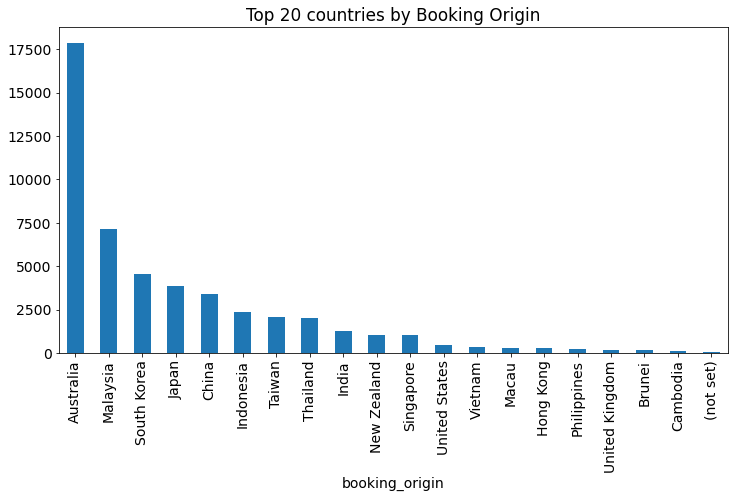

In [83]:
plt.figure(figsize=(12,6)) #figure size
y= df.groupby('booking_origin')['booking_origin'].count().nlargest(20)
y.plot(kind='bar',title='Top 20 countries by Booking Origin')

- From above graph we can observe australia and malaysia has higest booking origins

In [74]:
df.shape

(50000, 14)

Text(0.5, 1.0, 'Booking vs no_of_customers')

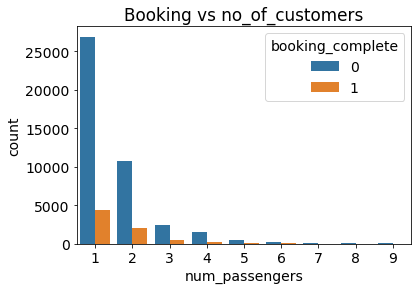

In [8]:
sns.countplot(data=df, hue = 'booking_complete', x = 'num_passengers')
plt.title('Booking vs no_of_customers')

Text(0.5, 1.0, 'Booking vs sales_channel')

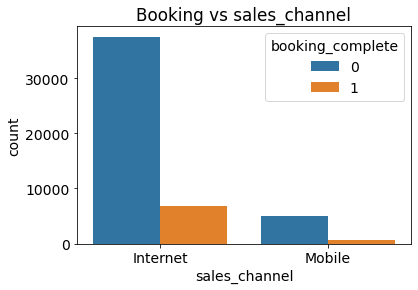

In [9]:
sns.countplot(data=df, hue = 'booking_complete', x = 'sales_channel')
plt.title('Booking vs sales_channel')

Text(0.5, 1.0, 'Booking vs trip_type')

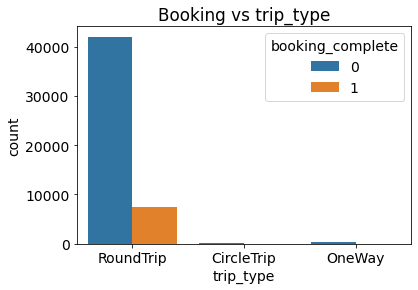

In [10]:
sns.countplot(data=df, hue = 'booking_complete', x = 'trip_type')
plt.title('Booking vs trip_type')

<AxesSubplot:xlabel='booking_complete', ylabel='purchase_lead'>

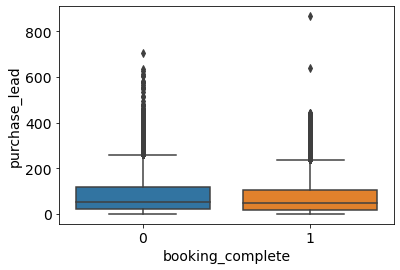

In [11]:
sns.boxplot(data=df, x = 'booking_complete', y = 'purchase_lead')

- Customers who ahave completed their booking and their purchase lead ranges between 0-300 and some potential customers have greater than 400,also surprisingly purchase lead of non booking customers also remains same

<AxesSubplot:xlabel='booking_complete', ylabel='length_of_stay'>

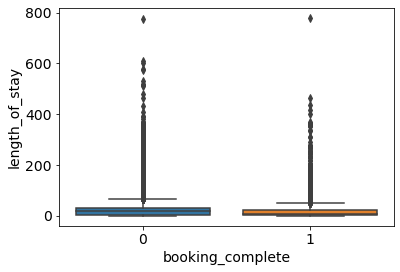

In [12]:
sns.boxplot(data=df, x = 'booking_complete', y = 'length_of_stay')

<AxesSubplot:xlabel='booking_complete', ylabel='flight_hour'>

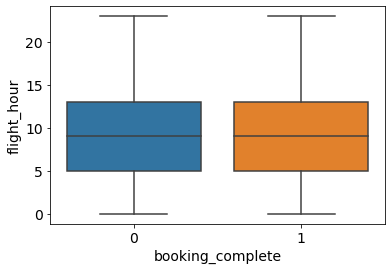

In [13]:
sns.boxplot(data=df, x = 'booking_complete', y = 'flight_hour')

Text(0.5, 1.0, 'Booking vs flight_day')

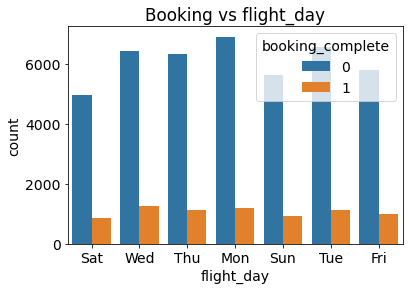

In [14]:
sns.countplot(data=df, hue = 'booking_complete', x = 'flight_day')
plt.title('Booking vs flight_day')

<AxesSubplot:xlabel='flight_duration'>

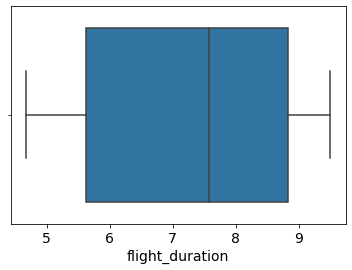

In [15]:
sns.boxplot(df['flight_duration'])

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df = pd.get_dummies(df, columns = ['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','sales_channel','trip_type'])
df['flight_day']= label_encoder.fit_transform(df['flight_day'])
df['booking_origin']= label_encoder.fit_transform(df['booking_origin'])  

In [17]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,wants_extra_baggage_0,wants_extra_baggage_1,wants_preferred_seat_0,wants_preferred_seat_1,wants_in_flight_meals_0,wants_in_flight_meals_1,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,2,AKLDEL,61,5.52,0,0,1,1,0,1,0,1,0,0,0,1
1,1,112,20,3,2,AKLDEL,61,5.52,0,1,0,1,0,1,0,1,0,0,0,1
2,2,243,22,17,6,AKLDEL,36,5.52,0,0,1,0,1,1,0,1,0,0,0,1
3,1,96,31,4,2,AKLDEL,61,5.52,0,1,0,1,0,0,1,1,0,0,0,1
4,2,68,22,15,6,AKLDEL,36,5.52,0,0,1,1,0,0,1,1,0,0,0,1


In [18]:
df=df.drop('route',axis=1)

In [19]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,flight_duration,booking_complete,wants_extra_baggage_0,wants_extra_baggage_1,wants_preferred_seat_0,wants_preferred_seat_1,wants_in_flight_meals_0,wants_in_flight_meals_1,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,2,61,5.52,0,0,1,1,0,1,0,1,0,0,0,1
1,1,112,20,3,2,61,5.52,0,1,0,1,0,1,0,1,0,0,0,1
2,2,243,22,17,6,36,5.52,0,0,1,0,1,1,0,1,0,0,0,1
3,1,96,31,4,2,61,5.52,0,1,0,1,0,0,1,1,0,0,0,1
4,2,68,22,15,6,36,5.52,0,0,1,1,0,0,1,1,0,0,0,1


In [20]:
df.groupby(['booking_complete'])['booking_complete'].count()

booking_complete
0    42522
1     7478
Name: booking_complete, dtype: int64

<AxesSubplot:xlabel='booking_complete'>

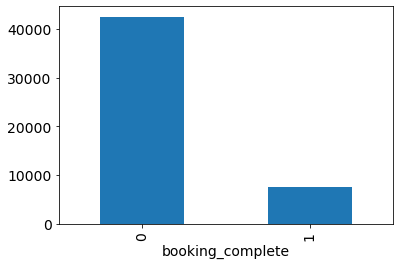

In [21]:
df.groupby(['booking_complete'])['booking_complete'].count().plot(kind='bar')

In [22]:
df.shape

(50000, 19)

In [23]:
x=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)

In [27]:
print('shape:',x_train.shape)
print('shape:',x_test.shape)
print('shape:',y_test.shape)
print('shape:',y_train.shape)

shape: (35000, 18)
shape: (15000, 18)
shape: (15000,)
shape: (35000,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [29]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
accuracy_score(y_test,y_pred)

0.8486

In [31]:
precision_score(y_test,y_pred)

0.4688888888888889

In [32]:
f1_score(y_test,y_pred)

0.15670256219829187

In [33]:
from sklearn.metrics import confusion_matrix


In [34]:
y=confusion_matrix(y_test,y_pred)

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

In [36]:
ConfusionMatrixDisplay(y)
plt.show()

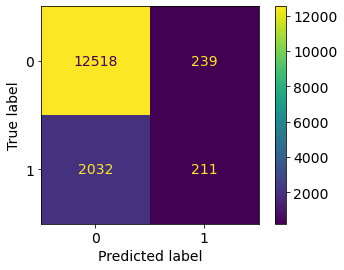

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=y,display_labels=model.classes_)
disp.plot()
plt.show()


In [38]:
recall_score(y_test,y_pred)

0.09407044137316095

In [39]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,flight_duration,booking_complete,wants_extra_baggage_0,wants_extra_baggage_1,wants_preferred_seat_0,wants_preferred_seat_1,wants_in_flight_meals_0,wants_in_flight_meals_1,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,2,61,5.52,0,0,1,1,0,1,0,1,0,0,0,1
1,1,112,20,3,2,61,5.52,0,1,0,1,0,1,0,1,0,0,0,1
2,2,243,22,17,6,36,5.52,0,0,1,0,1,1,0,1,0,0,0,1
3,1,96,31,4,2,61,5.52,0,1,0,1,0,0,1,1,0,0,0,1
4,2,68,22,15,6,36,5.52,0,0,1,1,0,0,1,1,0,0,0,1


In [40]:
x1=df.drop('booking_complete',axis=1)
y1=df['booking_complete']

In [41]:
#oversampling a data to balance a class
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x1,y1)

y_res.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size = 0.2)

In [43]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.9051678523134811

In [45]:
y=confusion_matrix(y_test,y_pred)

In [46]:
ConfusionMatrixDisplay(y)
plt.show()

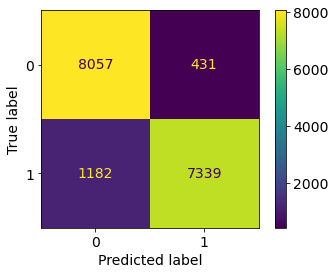

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=y,display_labels=model.classes_)
disp.plot()
plt.show()


In [48]:
recall_score(y_test,y_pred)

0.8612838868677385

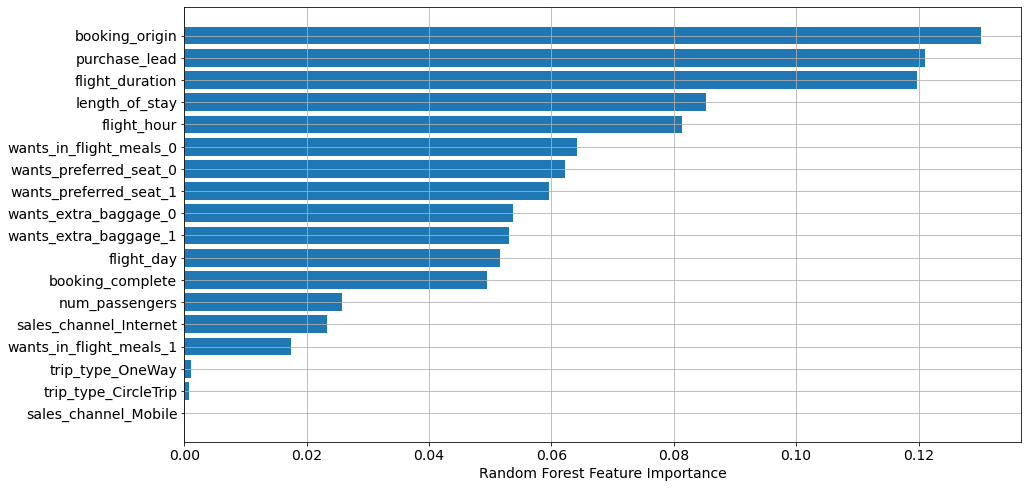

In [49]:
plt.figure(figsize=(15,8))
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.iloc[:,:-1].columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.grid()
plt.show()

In [50]:
precision_score(y_test,y_pred)

0.9445302445302445